## Straxferno session 3 - mini-analyses demo

In [99]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import strax
import straxen

st = straxen.contexts.xenon1t_dali()

In [100]:
runs = st.select_runs(available='event_info', run_mode='background*')
runs.head()

Checking data availability: 100%|██████████| 5/5 [00:35<00:00,  7.01s/it]


,name,number,start,reader.ini.name,trigger.events_built,end,tags,mode,livetime,tags.name,records_available,events_available,raw_records_available,event_info_available,peaklets_available
0,170204_1410,6786,2017-02-04 14:10:08+00:00,background_stable,19574,2017-02-04 15:10:13+00:00,"blinded,_sciencerun1_candidate,_sciencerun1",background_stable,01:00:05,NaN,True,True,True,True,True
1,170204_1510,6787,2017-02-04 15:10:28+00:00,background_stable,19634,2017-02-04 16:10:32+00:00,"blinded,_sciencerun1_candidate,_sciencerun1",background_stable,01:00:04,NaN,True,True,True,True,True
2,170204_1610,6788,2017-02-04 16:10:39+00:00,background_stable,19400,2017-02-04 17:10:43+00:00,"blinded,_sciencerun1_candidate,_sciencerun1",background_stable,01:00:04,NaN,True,True,True,True,True
3,170204_1710,6789,2017-02-04 17:10:51+00:00,background_stable,19415,2017-02-04 18:10:54+00:00,"blinded,_sciencerun1_candidate,_sciencerun1",background_stable,01:00:03,NaN,True,True,True,True,True
4,170204_1810,6790,2017-02-04 18:11:01+00:00,background_stable,19671,2017-02-04 19:11:05+00:00,"blinded,_sciencerun1_candidate,_sciencerun1",background_stable,01:00:04,NaN,True,True,True,True,True


In [101]:
background_run = '170204_1410'
argon_run = '181025_0030'

### Energy spectrum

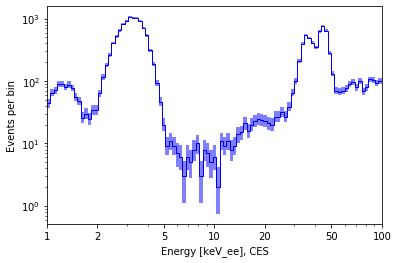

In [125]:
st.plot_energy_spectrum(argon_run)

In [103]:
#st.plot_energy_spectrum?

In [106]:
#st2 = straxen.contexts....

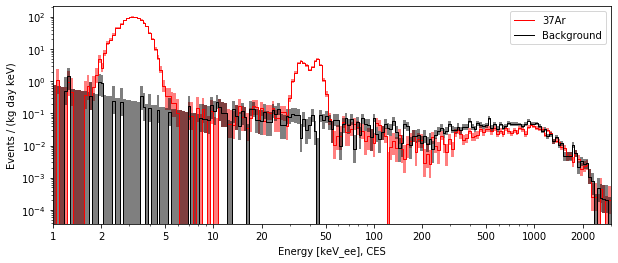

In [108]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))

options = dict(
    selection_str='(r < 38) & (-95 < z) & (z < -5)',   # Basic fiducial cut
    max_energy=3000, 
    unit='kg_day_kev',
    exposure_kg_sec=3600 * 1000,
    n_bins=200)

st.plot_energy_spectrum(argon_run, color='r', label='37Ar', **options)
st.plot_energy_spectrum(background_run, color='k', label='Background', **options)
# st2.plot()

plt.legend()

## Waveform plotting

There is also `st.waveform_display`: it might work sometimes. Currently it doesn't, at least not in my environment.

In [128]:
#st.show_config('event_info')

In [138]:
st.make(background_run, 'event_info', config=dict(trigger_min_area=12123))
#df = st.get_array(background_run, 'event_info', config=dict(trigger_min_area=12123), seconds_range=(20, 30))

In [78]:
df = st.get_array(background_run, 'event_info')
event = df[np.argmax(df['s2_area'])]
t = event['time']
window = (t, t + int(3e6) * 1)

In [110]:
#st.plot_waveform?

In [111]:
#st.plot

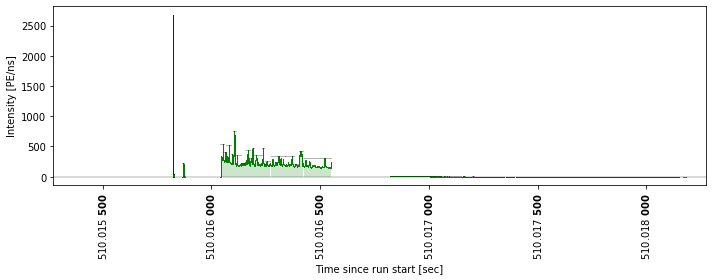

In [79]:
st.plot_waveform(background_run, time_range=window)

## Defining a new mini-analysis

In [84]:
def plot_vetos(vetos, t0):
    def normalize_time(t):
        return (t - t0) / int(1e9)

    for veto in vetos:
        plt.axvspan(
            normalize_time(veto['time']),
            normalize_time(strax.endtime(veto)),
            color='r', alpha=0.2, linewidth=0)
        
t0 = st.estimate_run_start(background_run)
vetos = st.get_array(background_run, 'veto_regions', time_range=window)

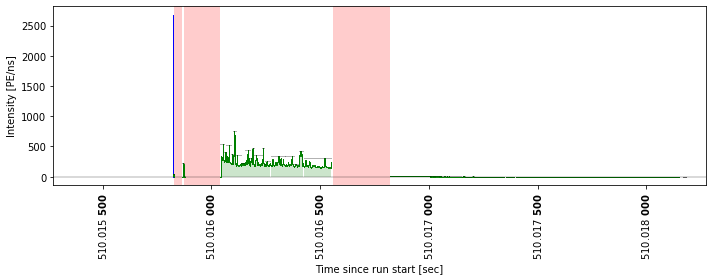

In [85]:
st.plot_waveform(background_run, time_range=window)

plot_vetos(vetos, t0)

In [112]:
@straxen.mini_analysis(requires=('veto_regions',))
def cool_waveform_display(context, run_id, 
                          veto_regions,
                          t_reference,
                          **kwargs):
    context.plot_waveform(run_id, **kwargs)
    plot_vetos(vetos, t_reference)

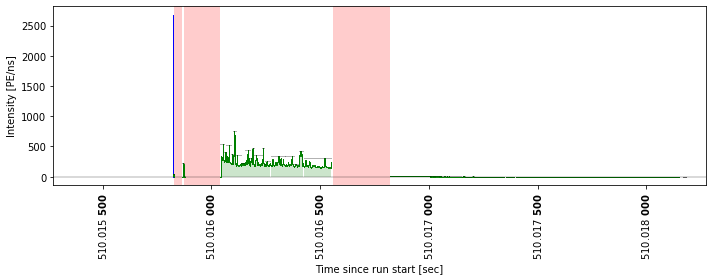

In [113]:
st.cool_waveform_display(background_run, time_range=window)

### Lowlevel plotting

In [118]:
t = event['s1_time']
window = (t - int(2e3), t + int(2e3))

In [119]:
#st.records_matrix?

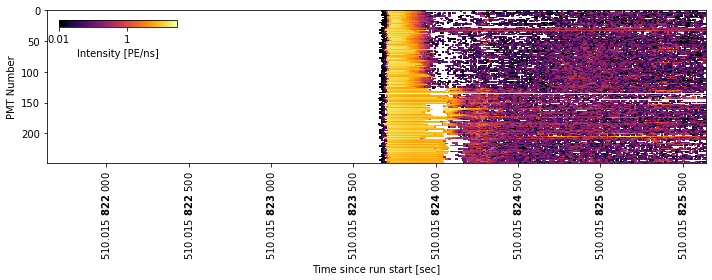

In [120]:
st.plot_records_matrix(background_run, time_range=window, cbar_loc='upper left')

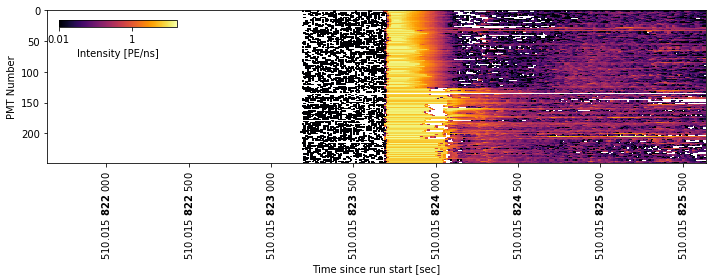

In [121]:
st.plot_records_matrix(background_run, time_range=window, cbar_loc='upper left', raw=True)

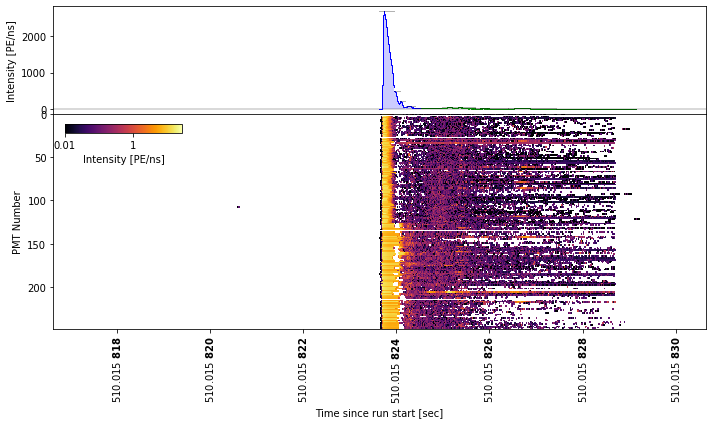

In [32]:
window = (t - int(7e3), t + int(7e3))
st.plot_waveform(background_run, time_range=window, deep=True, cbar_loc='upper left')

## Event scatter

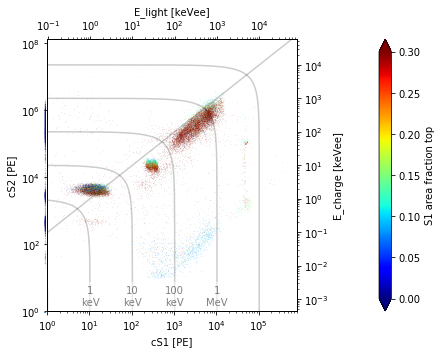

In [50]:
st.event_scatter(argon_run, s=0.5)

## Peak analyses

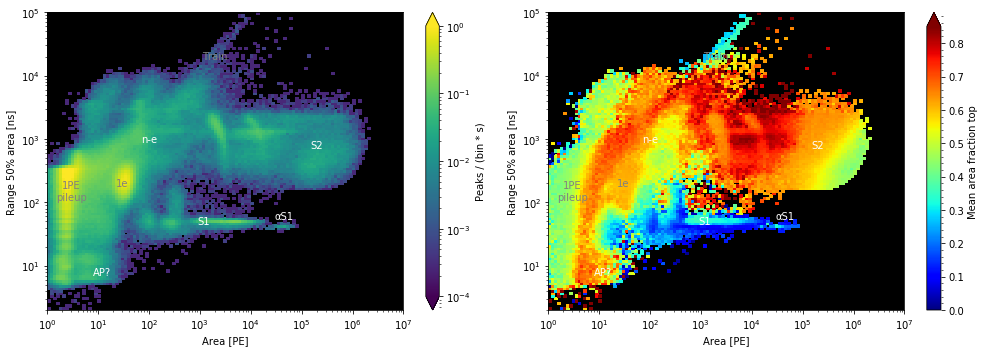

In [51]:
st.plot_peaks_aft_histogram(argon_run)

In [124]:
# st.plot_peak_classification(argon_run, s=0.1, selection_str='n_competing < 1')

In [61]:
st.size_mb(run_id, 'peak_basics')

59.382707

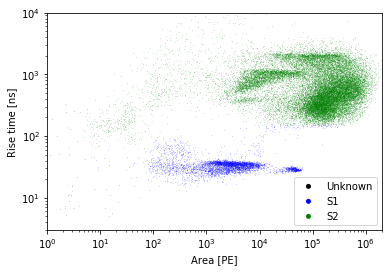

In [66]:
peaks = st.get_array(run_id, ['peak_basics', 'peak_proximity'], selection_str='n_competing <= 1')

st.plot_peak_classification(
    run_id,
    peaks=peaks,
    s=1, selection_str='n_competing <= 1')